In [1]:
%matplotlib inline

import textwrap

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php?c=2')
df = pd.DataFrame(resp.json())
df = df[df.comment != '']

In [3]:
total = len(df)

poubelles = df[df.comment.str.lower().str.match(r'.*(poubelle|conteneur).*')]
df = df[~df.token.isin(poubelles.token)]

vehicules = df[df.comment.str.lower().str.match(r'.*(voiture|station|garé|gare|gcum|parking|'
                                                r'moto|scooter|véhicule|utilitaire|camion|pv).*')]
autres = df[~df.token.isin(vehicules.token)]

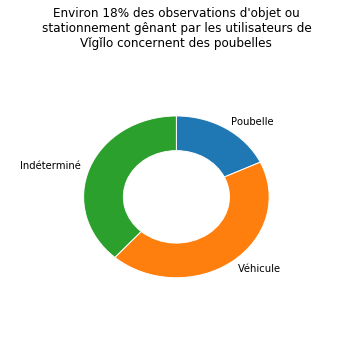

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.3
min_proportion = 0.04
cmap = plt.get_cmap("tab20c")
ax.pie(x=[len(poubelles), len(vehicules), len(autres)],
       radius=1 - size,
       wedgeprops=dict(width=size, edgecolor='w'),
       startangle=90,
       labels=['Poubelle', 'Véhicule', 'Indéterminé'],
       labeldistance=1.1,
       counterclock=False,
       pctdistance=0.8)

title = '\n'.join(textwrap.wrap("Environ {0:.0%} des observations d'objet ou stationnement "
                                "gênant par les utilisateurs de Vǐgǐlo concernent des poubelles".format(
    len(poubelles) / total), 50))
plt.title(title)

plt.tight_layout()
plt.show()